## Regresion Polinomial & Feature engineering

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [24]:
import tensorflow as tf
import time

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 

In [26]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [27]:
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [28]:
correlaciones = data.corr()['quality'].drop('quality')
print(correlaciones)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


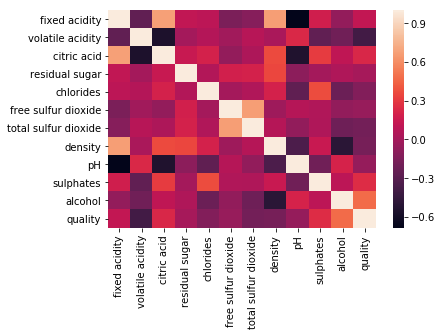

In [29]:
sns.heatmap(data.corr())
plt.show()

In [37]:
def buscar_caracteristicas(CorrelEntrada):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs
    return correlations[abs_corrs > CorrelEntrada].index.values.tolist()

In [38]:
caracteristicas = buscar_caracteristicas(0.06) 
print(features) 
x = data[features] 
y = data['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

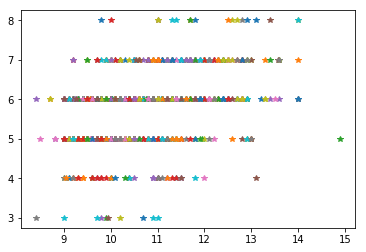

In [80]:
plt.plot(np.array([data['alcohol']]),np.array([data['quality']]), '*')
plt.show()

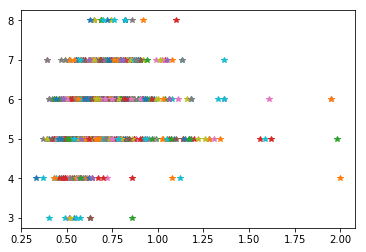

In [79]:
plt.plot(np.array([data['sulphates']]),np.array([data['quality']]), '*')
plt.show()

In [58]:
a = np.array(X_train['alcohol'])
b = np.array(X_train['sulphates'])

print("a =",a)
print("b =",b)

a = [ 9.5  9.6 11.9 ... 12.4  9.3  9.2]
b = [0.5  0.58 0.76 ... 0.78 0.6  0.55]


In [59]:
a2 = np.array(a*a)
b2 = np.array(b*b)
ab = np.array(a*b)

print("a cuadrado = ",a2)
print("b cuadrado = ",b2)
print("a*b = ",ab)

a cuadrado =  [ 90.25  92.16 141.61 ... 153.76  86.49  84.64]
b cuadrado =  [0.25   0.3364 0.5776 ... 0.6084 0.36   0.3025]
a*b =  [4.75  5.568 9.044 ... 9.672 5.58  5.06 ]


In [75]:
unos = np.linspace(1, 1, num=X_train.shape[0])
mat = np.array([ones, a, b, a2, b2, ab])
matt = mat.transpose()

print("Matriz de 1s = ", unos)
print("DataSet Unificado = ", mat)
print("DataSet Transpuesto = ", matt)

Matriz de 1s =  [1. 1. 1. ... 1. 1. 1.]
DataSet Unificado =  [[  1.       1.       1.     ...   1.       1.       1.    ]
 [  9.5      9.6     11.9    ...  12.4      9.3      9.2   ]
 [  0.5      0.58     0.76   ...   0.78     0.6      0.55  ]
 [ 90.25    92.16   141.61   ... 153.76    86.49    84.64  ]
 [  0.25     0.3364   0.5776 ...   0.6084   0.36     0.3025]
 [  4.75     5.568    9.044  ...   9.672    5.58     5.06  ]]
DataSet Transpuesto =  [[  1.       9.5      0.5     90.25     0.25     4.75  ]
 [  1.       9.6      0.58    92.16     0.3364   5.568 ]
 [  1.      11.9      0.76   141.61     0.5776   9.044 ]
 ...
 [  1.      12.4      0.78   153.76     0.6084   9.672 ]
 [  1.       9.3      0.6     86.49     0.36     5.58  ]
 [  1.       9.2      0.55    84.64     0.3025   5.06  ]]


In [103]:
tf.reset_default_graph()
grafo = tf.Graph()
with grafo.as_default():
    
    X = tf.placeholder("float",name="X") 
    Y = tf.placeholder("float",name="Y") 
    
    lr = tf.placeholder("float")
    W = tf.Variable(np.zeros((6,1)), name = "W", dtype="float")
        
    with tf.name_scope("hipotesis"):
        y_pred = tf.matmul(X, W,name="hipotesis")

    with tf.name_scope("funcion_costo"):
        cost = tf.reduce_mean(tf.pow(y_pred-Y, 2)) / (2)
        
    with tf.name_scope("Gradient_Descent"):
        cost_summary = tf.summary.scalar("cost",cost)
        
    optimizador = tf.train.GradientDescentOptimizer(lr).minimize(cost)
    init = tf.global_variables_initializer()

In [109]:
def train(epochs = 400, lrate = 0.01, step=20):
    tf.reset_default_graph()

    with tf.Session(graph=grafo) as sess: 
        writer = tf.summary.FileWriter('./graphs/lr='+str(lrate), sess.graph)
        sess.run(init) 
        
        for epoch in range(epochs): 
            _,c = sess.run([optimizador,cost_summary], feed_dict = {X : matt, Y : y, lr: lrate}) 
            writer.add_summary(c, epoch+1)

            if (epoch + 1) % step == 0:
                co,we= sess.run([cost,W],feed_dict = {X : matt, Y : y, lr: lrate}) 
                print("No. Epoch = ", (epoch + 1), "-> costo =", co, "W =", we)                 
        writer.close()

## Probando diferentes Training Rates

In [110]:
train(lrate = 0.0005)

No. Epoch =  20 -> costo = 1.5466739e+30 W = [[-1.3637715e+11]
 [-1.4483105e+12]
 [-9.0052583e+10]
 [-1.5557215e+13]
 [-6.3496364e+10]
 [-9.5870773e+11]]
No. Epoch =  40 -> costo = inf W = [[-4.3483804e+25]
 [-4.6179328e+26]
 [-2.8713247e+25]
 [-4.9604133e+27]
 [-2.0245793e+25]
 [-3.0568371e+26]]
No. Epoch =  60 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
No. Epoch =  80 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
No. Epoch =  100 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
No. Epoch =  120 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
No. Epoch =  140 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
No. Epoch =  160 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
No. Epoch =  180 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
No. Epoch =  200 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
No. Epoch =  220 -> costo = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 

In [111]:
train(lrate = 0.0001)

No. Epoch =  20 -> costo = 0.9904214 W = [[0.00090166]
 [0.00707888]
 [0.00055999]
 [0.04846996]
 [0.00039472]
 [0.00429325]]
No. Epoch =  40 -> costo = 0.98619425 W = [[0.00137409]
 [0.00960734]
 [0.00083581]
 [0.04814955]
 [0.00058815]
 [0.00556698]]
No. Epoch =  60 -> costo = 0.98200536 W = [[0.00184501]
 [0.01212775]
 [0.00110991]
 [0.0478307 ]
 [0.00077947]
 [0.00682806]]
No. Epoch =  80 -> costo = 0.9778549 W = [[0.00231444]
 [0.01464013]
 [0.00138228]
 [0.04751341]
 [0.00096868]
 [0.00807661]]
No. Epoch =  100 -> costo = 0.9737421 W = [[0.00278237]
 [0.01714452]
 [0.00165296]
 [0.04719765]
 [0.0011558 ]
 [0.00931273]]
No. Epoch =  120 -> costo = 0.9696662 W = [[0.00324881]
 [0.01964097]
 [0.00192195]
 [0.04688342]
 [0.00134085]
 [0.01053652]]
No. Epoch =  140 -> costo = 0.9656267 W = [[0.00371378]
 [0.02212949]
 [0.00218926]
 [0.04657072]
 [0.00152386]
 [0.01174808]]
No. Epoch =  160 -> costo = 0.9616239 W = [[0.00417727]
 [0.02461014]
 [0.0024549 ]
 [0.04625953]
 [0.00170482]
 